<a href="https://colab.research.google.com/github/rajat459/Machne-learning/blob/main/flipcart_Mobile_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
Product_name = []
Offer_Prices = []
Original_Prices = []
Description =[]
Reviews = []

In [ ]:
for i in range(2,5):
    url = "https://www.flipkart.com/search?q=vivo+mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.brand%255B%255D%3Dvivo&page="+str(i)
    r = requests.get(url)

    soup = BeautifulSoup(r.text, "lxml")
    box = soup.find("div",class_ = "DOjaWF gdgoEp")

    names = box.find_all("div",class_ = "KzDlHZ")

    for j in names:
        name = j.text
        Product_name.append(name)

    Offer_prices = box.find_all("div",class_ = "Nx9bqj _4b5DiR")

    for k in Offer_prices:
        name = k.text
        Offer_Prices.append(name)

    Original_prices = box.find_all("div",class_ = "yRaY8j ZYYwLA")

    for h in Original_prices:
        name = h.text
        Original_Prices.append(name)


    desc = box.find_all("ul",class_ = "G4BRas")


    for l in desc:
        name = l.text
        Description.append(name)


    reviews = box.find_all("div",class_ = "XQDdHH")

    for m in reviews:
        name = m.text
        Reviews.append(name)


min_length = min(len(Product_name), len(Offer_Prices), len(Original_Prices),  len(Description), len(Reviews))

# Trim all lists to the minimum length
Product_name = Product_name[:min_length]
Offer_Prices = Offer_Prices[:min_length]
Original_Prices = Original_Prices[:min_length]
Description = Description[:min_length]
Reviews = Reviews[:min_length]



In [ ]:
df = pd.DataFrame({"Product Name":Product_name,"Offer_Prices":Offer_Prices,"Original_Prices":Original_Prices,"Description":Description,"Reviews":Reviews})
print(df)

0    vivo Y29 5G (Glacier Blue, 128 GB)------₹15,499---------₹17,999   
1   vivo T3 Ultra (Frost Green, 256 GB)------₹31,999---------₹37,999   
2   vivo V40e 5G (Royal Bronze, 128 GB)------₹26,999---------₹33,999   
3   vivo T2x 5G (Glimmer Black, 128 GB)------₹12,299---------₹17,999   
4     vivo V40e 5G (Mint Green, 256 GB)------₹28,999---------₹35,999   
..                                  ...          ...             ...   
67   vivo V30 5G (Andaman Blue, 256 GB)------₹33,990---------₹42,999   
68      vivo Y21T (Pearl White, 128 GB)------₹12,999---------₹19,990   
69    vivo T2x 5G (Aurora Gold, 128 GB)------₹12,999---------₹18,999   
70  vivo V30 5G (Classic Black, 256 GB)------₹31,990---------₹40,999   
71    vivo V40 5G (Ganges Blue, 128 GB)------₹34,999---------₹39,999   

In [ ]:
df=pd.read_csv("/content/Vivo_mobile_1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Vivo_mobile_1.csv'

In [ ]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72 non-null     int64  
 1   Product Name     72 non-null     object 
 2   Offer_Prices     72 non-null     object 
 3   Original_Prices  72 non-null     object 
 4   Description      72 non-null     object 
 5   Reviews          72 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ KB


(None,
    Unnamed: 0                         Product Name Offer_Prices  \
 0           0   vivo Y29 5G (Glacier Blue, 128 GB)      ₹15,499   
 1           1  vivo T3 Ultra (Frost Green, 256 GB)      ₹31,999   
 2           2  vivo V40e 5G (Royal Bronze, 128 GB)      ₹26,999   
 3           3  vivo T2x 5G (Glimmer Black, 128 GB)      ₹12,299   
 4           4    vivo V40e 5G (Mint Green, 256 GB)      ₹28,999   
 
   Original_Prices                                        Description  Reviews  
 0         ₹17,999  6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...      4.4  
 1         ₹37,999  8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Disp...      4.5  
 2         ₹33,999  8 GB RAM | 128 GB ROM17.2 cm (6.77 inch) Displ...      4.4  
 3         ₹17,999  4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...      4.4  
 4         ₹35,999  8 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Displ...      4.4  )

In [ ]:
# Remove ₹ symbol and convert price columns to numeric
df["Offer_Prices"] = df["Offer_Prices"].str.replace("₹", "").str.replace(",", "").astype(int)
df["Original_Prices"] = df["Original_Prices"].str.replace("₹", "").str.replace(",", "").astype(int)

# Drop the unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Calculate Discount Percentage
df["Discount_Percentage"] = ((df["Original_Prices"] - df["Offer_Prices"]) / df["Original_Prices"]) * 100

# Display the cleaned dataset with new column
df.head()


,Product Name,Offer_Prices,Original_Prices,Description,Reviews,Discount_Percentage
0,"vivo Y29 5G (Glacier Blue, 128 GB)",15499,17999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.4,13.889661
1,"vivo T3 Ultra (Frost Green, 256 GB)",31999,37999,8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Disp...,4.5,15.789889
2,"vivo V40e 5G (Royal Bronze, 128 GB)",26999,33999,8 GB RAM | 128 GB ROM17.2 cm (6.77 inch) Displ...,4.4,20.588841
3,"vivo T2x 5G (Glimmer Black, 128 GB)",12299,17999,4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,4.4,31.668426
4,"vivo V40e 5G (Mint Green, 256 GB)",28999,35999,8 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Displ...,4.4,19.444985


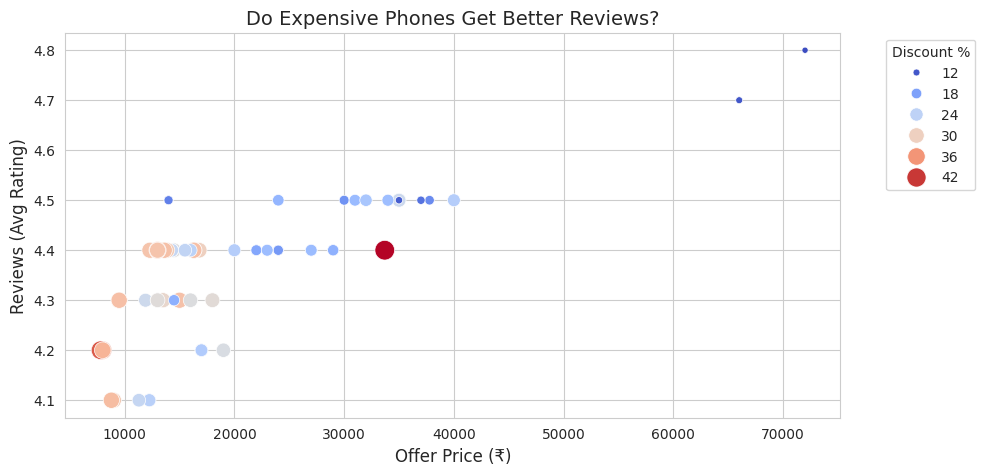

In [ ]:
# 1. Scatter Plot: Price vs Reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Offer_Prices", y="Reviews", hue="Discount_Percentage", size="Discount_Percentage", palette="coolwarm", sizes=(20, 200))
plt.title("Do Expensive Phones Get Better Reviews?", fontsize=14)
plt.xlabel("Offer Price (₹)", fontsize=12)
plt.ylabel("Reviews (Avg Rating)", fontsize=12)
plt.legend(title="Discount %", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-46-295ebc7158dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_value_models, x="Product Name", y="Value_Score", palette="viridis")


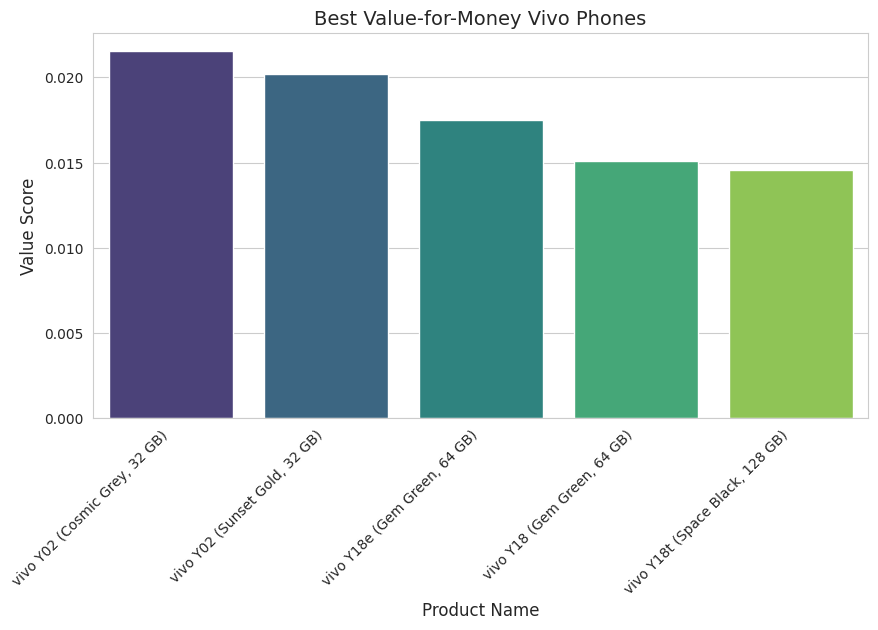

In [ ]:
# 2. Bar Chart: Best Value-for-Money Phones
plt.figure(figsize=(10, 5))
sns.barplot(data=best_value_models, x="Product Name", y="Value_Score", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Best Value-for-Money Vivo Phones", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Value Score", fontsize=12)
plt.show()


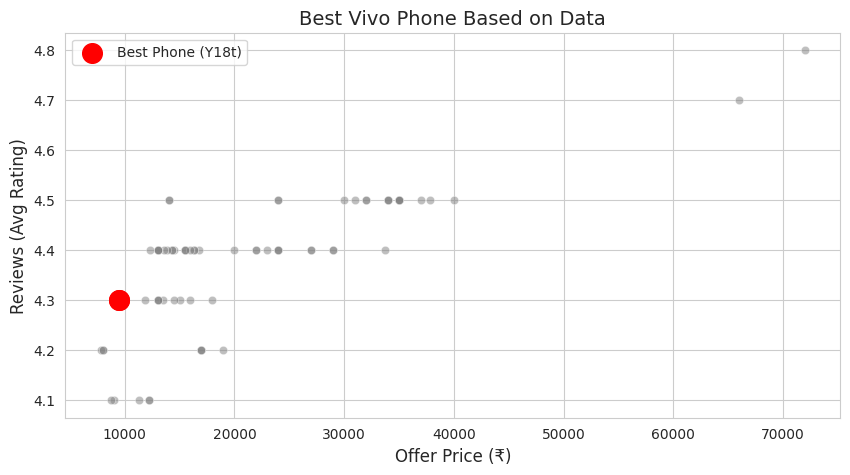

In [ ]:
# 5. Highlighting the Best Vivo Phone Based on Data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Offer_Prices", y="Reviews", color="gray", alpha=0.5)
best_phone = df.loc[df["Product Name"] == "vivo Y18t (Space Black, 128 GB)"]

# Highlighting the Best Phone
plt.scatter(best_phone["Offer_Prices"], best_phone["Reviews"], color="red", s=200, label="Best Phone (Y18t)")

plt.title("Best Vivo Phone Based on Data", fontsize=14)
plt.xlabel("Offer Price (₹)", fontsize=12)
plt.ylabel("Reviews (Avg Rating)", fontsize=12)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.head()

,Unnamed: 0,Product Name,Offer_Prices,Original_Prices,Description,Reviews
0,0,"vivo Y29 5G (Glacier Blue, 128 GB)","₹15,499","₹17,999",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.4
1,1,"vivo T3 Ultra (Frost Green, 256 GB)","₹31,999","₹37,999",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Disp...,4.5
2,2,"vivo V40e 5G (Royal Bronze, 128 GB)","₹26,999","₹33,999",8 GB RAM | 128 GB ROM17.2 cm (6.77 inch) Displ...,4.4
3,3,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,299","₹17,999",4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,4.4
4,4,"vivo V40e 5G (Mint Green, 256 GB)","₹28,999","₹35,999",8 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Displ...,4.4


In [ ]:
df.columns

Index(['Unnamed: 0', 'Product Name', 'Offer_Prices', 'Original_Prices',
       'Description', 'Reviews'],
      dtype='object')

In [ ]:
# Drop Unnecessary Column if present
if ('Unnamed: 0') in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [ ]:
price_columns = ['Offer_Prices', 'Original_Prices']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)

In [ ]:
# cheack missing vaues
df.isnull().sum()

,0
Product Name,0
Offer_Prices,0
Original_Prices,0
Description,0
Reviews,0


In [ ]:
# Define Target
X = df.drop(columns=['Offer_Prices'])  # Predicting Offer Prices
y = df['Offer_Prices']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

num_features = ['Original_Prices', 'Reviews']
cat_features = ['Product Name']
text_features = ['Description']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Preprocessing
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
tfidf = TfidfVectorizer()
#TfidfVectorizer() is a text preprocessing tool from sklearn.feature_extraction.\
#text that converts text data into numerical.

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
        ('text', TfidfVectorizer(), text_features[0])
    ]
)

In [ ]:
# Create Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('LinearRegression',LinearRegression())
])


In [ ]:
# Train Initial Model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
initial_r2 = r2_score(y_test, y_pred)


In [ ]:
print(initial_r2)

0.6690843904915937


In [ ]:
fd# Fine-Tuning
param_grid = {
    'regressor': [Ridge(), Lasso()],
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
]), param_grid, cv=3, scoring='r2')

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.526e+05, tolerance: 5.177e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.713e+05, tolerance: 5.177e+05
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Original_Prices',
                                                                          'Reviews']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Product '
                                                                          'Name']),
                                                                        ('text',
                                                                         TfidfVectorizer(),
                                                                         'Description')])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor': [Ridge(), Lasso()],
                         'regressor__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [ ]:
# Best Model After Fine-Tuning
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)


In [ ]:
print(r2)

0.9875146479418042


In [ ]:
# user input
print("Enter details for prediction:")
original_price = float(input("Enter Original Price: "))
reviews = float(input("Enter Number of Reviews: "))
product_name = input("Enter Product Name: ")
description = input("Enter Product Description: ")

# again dataframe
user_data = pd.DataFrame([[original_price, reviews, product_name, description]], columns=num_features + cat_features + text_features)

# Future Prices
future_prediction = best_model.predict(user_data)
print("Offer Price:", future_prediction[0])


Enter details for prediction:
